Crea i singoli file json che vengono poi letti da Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [1]:
from EEG_utils.EEG_utils_Siena import *

In [2]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\siena-scalp-eeg\\1.0.0\\"

# observations = ["PN07-1"]

patient_id = "PN00"
record_id = "4"

num_points = 300

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN00\PN00-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


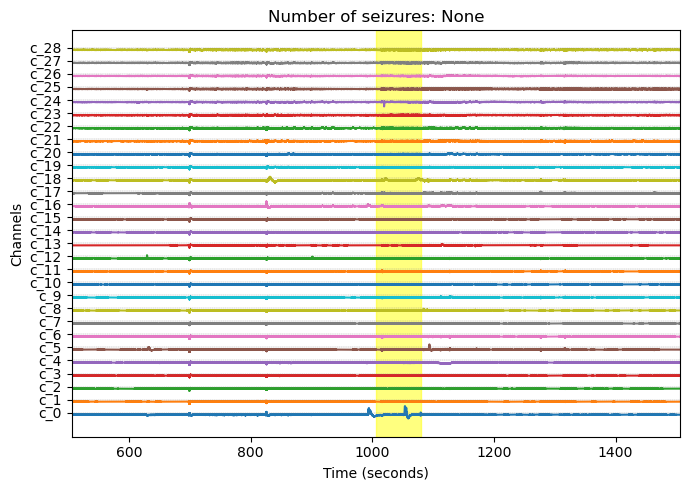

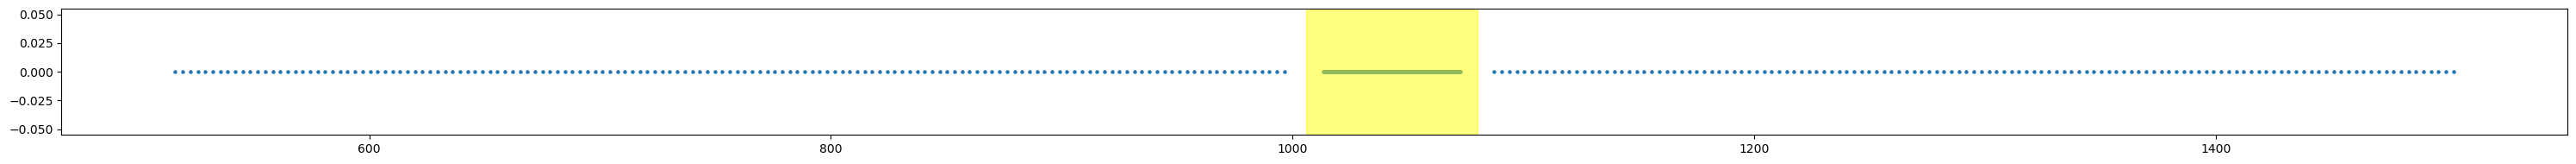

Creating graphs...
k: 5120 ---> t: 516.0 (seizure class: 0)
k: 6782 ---> t: 519.24609375 (seizure class: 0)
k: 8444 ---> t: 522.4921875 (seizure class: 0)
k: 10106 ---> t: 525.73828125 (seizure class: 0)
k: 11768 ---> t: 528.984375 (seizure class: 0)
k: 13430 ---> t: 532.23046875 (seizure class: 0)
k: 15092 ---> t: 535.4765625 (seizure class: 0)
k: 16754 ---> t: 538.72265625 (seizure class: 0)
k: 18416 ---> t: 541.96875 (seizure class: 0)
k: 20078 ---> t: 545.21484375 (seizure class: 0)
k: 21740 ---> t: 548.4609375 (seizure class: 0)
k: 23402 ---> t: 551.70703125 (seizure class: 0)
k: 25064 ---> t: 554.953125 (seizure class: 0)
k: 26726 ---> t: 558.19921875 (seizure class: 0)
k: 28388 ---> t: 561.4453125 (seizure class: 0)
k: 30050 ---> t: 564.69140625 (seizure class: 0)
k: 31712 ---> t: 567.9375 (seizure class: 0)
k: 33374 ---> t: 571.18359375 (seizure class: 0)
k: 35036 ---> t: 574.4296875 (seizure class: 0)
k: 36698 ---> t: 577.67578125 (seizure class: 0)
k: 38360 ---> t: 580.921875

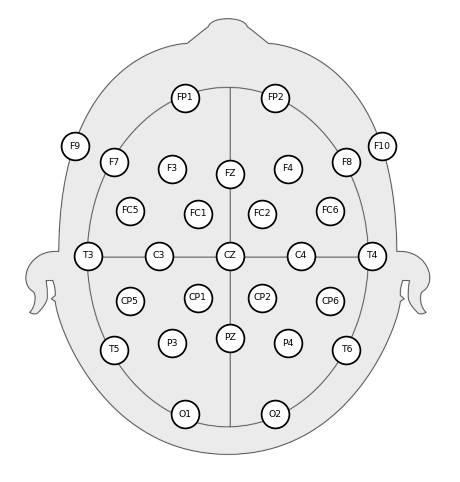

In [3]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=3)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [4]:
import datetime

now = datetime.datetime.now()
print("Ultima esecuzione completa:", now.strftime("%d/%m/%Y, ore %H:%M"))

Ultima esecuzione completa: 24/03/2025, ore 14:41


In [5]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)